# Predict Trip Direction

In [1]:
!pip install -e ..

Obtaining file:///Users/tobiasolbruck/University/PDS/PDS_Project
  Attempting uninstall: PDS-Project
    Found existing installation: PDS-Project 0.0.1.dev16
    Uninstalling PDS-Project-0.0.1.dev16:
      Successfully uninstalled PDS-Project-0.0.1.dev16
  Running setup.py develop for PDS-Project


## Import Packages

In [2]:
import nextbike

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import numpy as np
import scipy.stats as stats
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import sklearn.metrics
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import pickle
from sklearn.externals.joblib import dump, load

## Import Data

In [4]:
start = time.time()
df = nextbike.io.read_file()
df = nextbike.io.preprocessData(df)
df_trips = nextbike.io.createTrips(df)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

Error at lines:
128324
128580
128674
128824
128860
129114
129340
129513
130326
648905
649161
649255
649405
649441
649695
649921
650094
650907
1169486
1169742
1169836
1169986
1170022
1170276
1170502
1170675
1171488
294.243s

In [5]:
df_trips.describe()

,bNumber,duration,sLong,sLat,eLong,eLat,bType,sPlaceNumber,ePlaceNumber
count,630918.000000,630918,630918.000000,6.309180e+05,630918.000000,6.309180e+05,630918.000000,630918.000000,630918.000000
mean,11208.548120,0 days 00:34:36.600667,8.771265,2.043544e+02,8.771277,1.274882e+02,14.932864,4624.776064,4608.826034
std,1212.488881,0 days 01:20:22.209634,0.015858,3.520803e+04,0.009172,2.486642e+04,1.375097,1573.653221,1594.160876
min,11070.000000,0 days 00:02:00,3.038746,-5.041531e+02,6.775276,-5.041531e+02,0.000000,0.000000,0.000000
25%,11135.000000,0 days 00:07:00,8.769918,5.080472e+01,8.769918,5.080472e+01,15.000000,5150.000000,5150.000000
50%,11188.000000,0 days 00:12:00,8.773266,5.080887e+01,8.773266,5.080887e+01,15.000000,5158.000000,5158.000000
75%,11241.000000,0 days 00:23:00,8.775086,5.081427e+01,8.775086,5.081420e+01,15.000000,5165.000000,5165.000000
max,91202.000000,0 days 23:27:00,10.412875,8.084779e+06,9.909201,8.063592e+06,71.000000,5178.000000,5178.000000


In [6]:
start = time.time()
df_trips_cleaned = nextbike.io.drop_outliers(df_trips)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

96.518s

In [7]:
df_trips_cleaned.describe()

,bNumber,duration,sLong,sLat,eLong,eLat,bType,sPlaceNumber,ePlaceNumber,durationInSec
count,564606.000000,564606,564606.000000,5.646060e+05,564606.000000,5.646060e+05,564606.000000,564606.000000,564606.000000,564606.000000
mean,11207.575897,0 days 00:14:51.701469,8.771273,2.223879e+02,8.771286,1.364972e+02,14.929289,4614.194190,4598.898104,891.701470
std,1227.304220,0 days 00:14:54.615618,0.016525,3.721817e+04,0.009029,2.628614e+04,1.401380,1587.291675,1606.662402,894.615618
min,11070.000000,0 days 00:02:00,3.038746,-5.041531e+02,6.775276,-5.041531e+02,0.000000,0.000000,0.000000,120.000000
25%,11133.000000,0 days 00:06:00,8.769918,5.080472e+01,8.769918,5.080472e+01,15.000000,5150.000000,5147.000000,360.000000
50%,11186.000000,0 days 00:10:00,8.773266,5.080887e+01,8.773266,5.080887e+01,15.000000,5158.000000,5158.000000,600.000000
75%,11240.000000,0 days 00:18:00,8.775086,5.081419e+01,8.775086,5.081465e+01,15.000000,5165.000000,5165.000000,1080.000000
max,91202.000000,0 days 01:52:00,10.412875,8.084779e+06,9.909201,8.063592e+06,71.000000,5178.000000,5178.000000,6720.000000


In [8]:
start = time.time()
dfWeather = nextbike.io.getWeatherData()
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

3.562s

In [9]:
# merge with weather data
dfWeatherMinutes = pd.DataFrame({'date': pd.date_range('2019-01-01', '2020-01-01', freq='min', closed='left')})
dfWeatherMinutes = dfWeatherMinutes.set_index('date')
dfWeatherMinutes = dfWeatherMinutes.join(dfWeather)
dfWeatherMinutes = dfWeatherMinutes.fillna(axis='index', method='ffill')
df_trips_cleaned = df_trips_cleaned.join(dfWeatherMinutes, how='left', on='sTime')

In [10]:
df_trips_cleaned.describe()

,bNumber,duration,sLong,sLat,eLong,eLat,bType,sPlaceNumber,ePlaceNumber,durationInSec,temperature,precipitation
count,564606.000000,564606,564606.000000,5.646060e+05,564606.000000,5.646060e+05,564606.000000,564606.000000,564606.000000,564606.000000,564606.000000,564606.000000
mean,11207.575897,0 days 00:14:51.701469,8.771273,2.223879e+02,8.771286,1.364972e+02,14.929289,4614.194190,4598.898104,891.701470,13.392695,0.006254
std,1227.304220,0 days 00:14:54.615618,0.016525,3.721817e+04,0.009029,2.628614e+04,1.401380,1587.291675,1606.662402,894.615618,9.215130,0.057157
min,11070.000000,0 days 00:02:00,3.038746,-5.041531e+02,6.775276,-5.041531e+02,0.000000,0.000000,0.000000,120.000000,-12.500000,0.000000
25%,11133.000000,0 days 00:06:00,8.769918,5.080472e+01,8.769918,5.080472e+01,15.000000,5150.000000,5147.000000,360.000000,6.300000,0.000000
50%,11186.000000,0 days 00:10:00,8.773266,5.080887e+01,8.773266,5.080887e+01,15.000000,5158.000000,5158.000000,600.000000,12.800000,0.000000
75%,11240.000000,0 days 00:18:00,8.775086,5.081419e+01,8.775086,5.081465e+01,15.000000,5165.000000,5165.000000,1080.000000,19.800000,0.000000
max,91202.000000,0 days 01:52:00,10.412875,8.084779e+06,9.909201,8.063592e+06,71.000000,5178.000000,5178.000000,6720.000000,42.000000,3.170000


In [11]:
nextbike.model.trainKNNRegression(df_trips_cleaned)

precision    recall  f1-score   support

           0       0.77      0.78      0.77     96565
           1       0.70      0.68      0.69     72817

    accuracy                           0.74    169382
   macro avg       0.73      0.73      0.73    169382
weighted avg       0.74      0.74      0.74    169382



In [12]:
row = df_trips_cleaned.iloc[:5,]
row

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationInSec,temperature,precipitation
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159,660,-10.7,0.0
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178,480,-2.2,0.0
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150,900,-1.1,0.0
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150,180,-1.5,0.0
5,11270,2019-01-20 00:25:00,2019-01-20 00:37:00,00:12:00,8.775948,50.813203,8.775948,50.813203,True,15,5156,5156,720,-9.7,0.0


In [13]:
y = nextbike.model.predictTripDirection(row)
y

array([[0.8],
       [0. ],
       [0.4],
       [0. ],
       [1. ]])

# Testing different Classifiers

## Create new feature

### Create feature describing whether a trip goes to university or not

In [14]:
def isStationAtUniversity(row):
    # Anatomie
    if row['ePlaceNumber'] == 5140:
        val = 1
    # Neue Universitaetsbibliothek
    elif row['ePlaceNumber'] == 5145:
        val = 1
    # Am Plan/Wirtschaftswissenschaften
    elif row['ePlaceNumber'] == 5152:
        val = 1
    # Biegenstrasse/Volkshochschule
    elif row['ePlaceNumber'] == 5156:
        val = 1
    # Frankfurter Strasse/Psychologie
    elif row['ePlaceNumber'] == 5159:
        val = 1
    # Audimax
    elif row['ePlaceNumber'] == 5166:
        val = 1
    # Marbacher Weg/Pharmazie
    elif row['ePlaceNumber'] == 5167:
        val = 1
    # Philosophische Fakultaet
    elif row['ePlaceNumber'] == 5169:
        val = 1
    # Universitaetsstadion
    elif row['ePlaceNumber'] == 5175:
        val = 1
    # Universitaetsstrasse/Bibliothek Jura
    elif row['ePlaceNumber'] == 5176:
        val = 1
    # Carolinenhaus/Elisabethkirche
    elif row['ePlaceNumber'] == 5144:
        val = 1
    # Elisabeth-Blochmann-Platz
    elif row['ePlaceNumber'] == 5158:
        val = 1
    # Am Schülerpark
    elif row['ePlaceNumber'] == 5147:
        val = 1
    # Aquamar
    elif row['ePlaceNumber'] == 5171:
        val = 1
    # all other stations
    else:
        val = 0
    return val

In [15]:
start = time.time()
df_trips_cleaned['tripToUniversity'] = df_trips_cleaned.apply(isStationAtUniversity, axis=1)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

77.245s

### Create feature describing whether it is term or term break

In [16]:
def isTerm(row):
    value = -1
    if datetime.datetime(2019, 1, 7) <= row['sTime'] <= datetime.datetime(2019, 2, 15):
        value = 1
    elif datetime.datetime(2019, 4, 15) <= row['sTime'] <= datetime.datetime(2019, 7, 19):
        value = 1
    elif datetime.datetime(2019, 10, 14) <= row['sTime'] <= datetime.datetime(2019, 12, 20):
        value = 1
    else:
        value = 0
    return value

In [17]:
start = time.time()
df_trips_cleaned['isTerm'] = df_trips_cleaned.apply(isTerm, axis=1)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

28.836s

In [18]:
df_trips_cleaned['month'] = df_trips_cleaned['sTime'].dt.month
df_trips_cleaned['dayOfWeek'] = df_trips_cleaned['sTime'].dt.dayofweek
df_trips_cleaned['hour'] = df_trips_cleaned['sTime'].dt.hour
df_trips_cleaned['minute'] = df_trips_cleaned['sTime'].dt.minute

In [19]:
def isUniOpen(row):
    value = -1
    if row['dayOfWeek'] <= 5:
        if 8 <= row['hour'] <= 18:
            value = 1
        else:
            value = 0
    else:
        value = 0
    return value

In [20]:
start = time.time()
df_trips_cleaned['isUniOpen'] = df_trips_cleaned.apply(isUniOpen, axis=1)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

23.129s

### Merge weather data

In [21]:
dfWeather = nextbike.io.getWeatherData()
dfWeatherMinutes = pd.DataFrame({'date': pd.date_range('2019-01-01', '2020-01-01', freq='min', closed='left')})
dfWeatherMinutes = dfWeatherMinutes.set_index('date')
dfWeatherMinutes = dfWeatherMinutes.join(dfWeather)
dfWeatherMinutes = dfWeatherMinutes.fillna(axis='index', method='ffill')
df_trips_cleaned = df_trips_cleaned.join(dfWeatherMinutes, how='left', on='sTime')
df_trips_cleaned.head()

ValueError: columns overlap but no suffix specified: Index(['temperature', 'precipitation'], dtype='object')

## Search for good input feature

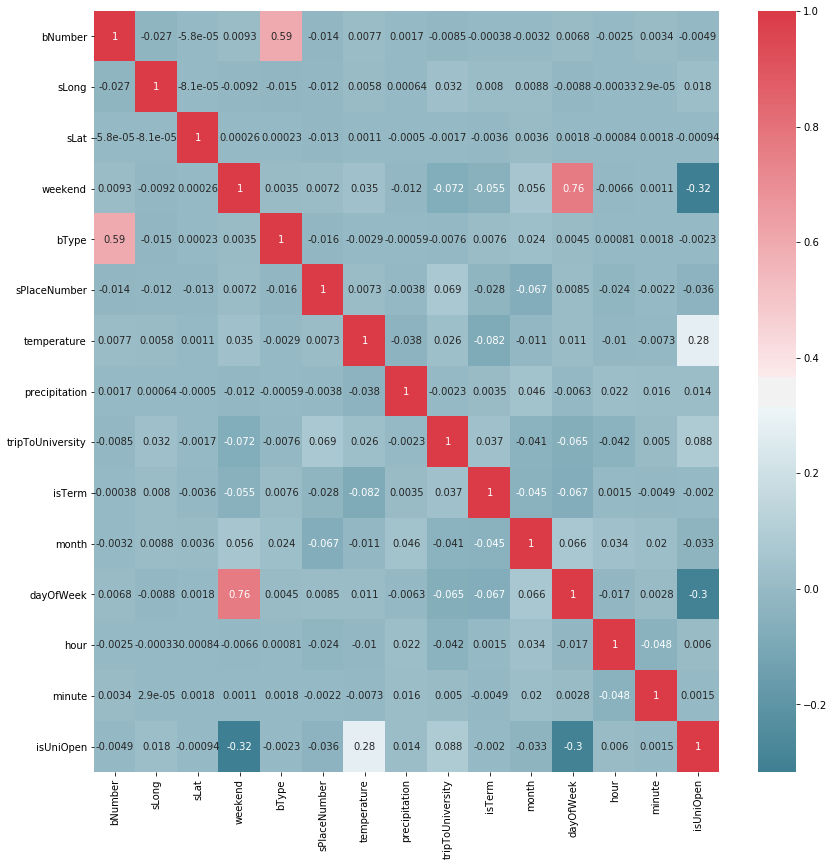

In [23]:
# show feature correlation
plt.figure(figsize=(14,14))
#plot heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g=sns.heatmap(df_trips_cleaned.drop(['sTime', 'eLong', 'eLat', 'ePlaceNumber', 'durationInSec'], axis=1).corr(),annot=True,cmap=cmap)

[0.17674914 0.07600663 0.08784249 0.00437464 0.00234908 0.06296685
 0.00709805 0.06430171 0.05373959 0.10405308 0.17478806 0.00693369
 0.16267827 0.01611871]


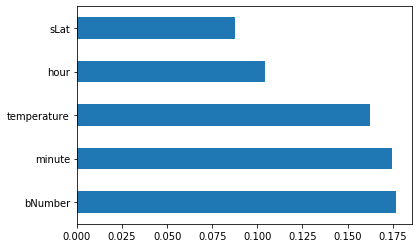

In [17]:
# Feature Importance
X = (df_trips_cleaned.drop(['tripToUniversity', 'sTime', 'eLong', 'eLat', 'ePlaceNumber', 'durationInSec', 'eTime', 'duration'], axis=1))
y = pd.DataFrame(df_trips_cleaned['tripToUniversity'])

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Define input feature

In [18]:
# Define input feature
X = pd.DataFrame()

X['sPlaceNumber'] = df_trips_cleaned['sPlaceNumber']
#X['sLong'] = df_trips_cleaned['sLong']
#X['sLat'] = df_trips_cleaned['sLat']

X['day'] = df_trips_cleaned['dayOfWeek']
X['isTerm'] = df_trips_cleaned['isTerm']
X['isUniOpen'] = df_trips_cleaned['isUniOpen']
X['month'] = df_trips_cleaned['month']
X['hour'] = df_trips_cleaned['hour']
X['temperature'] = df_trips_cleaned['temperature']
X['precipitation'] = df_trips_cleaned['precipitation']

# create dummies for sPlaceNumber
sPlace = pd.get_dummies(df_trips_cleaned["sPlaceNumber"], drop_first=True)
X.drop('sPlaceNumber', axis=1, inplace=True)
X = pd.concat([X, sPlace], axis=1)

# Define target feature
y = pd.DataFrame(df_trips_cleaned['tripToUniversity'])
X

,day,isTerm,isUniOpen,month,hour,temperature,precipitation,5140,5141,5142,...,5168,5169,5171,5172,5173,5174,5175,5176,5177,5178
0,6,1,0,1,1,-10.7,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,6,1,0,1,11,-2.2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0,1,15,-1.1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,1,0,1,15,-1.5,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,0,1,0,-9.7,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630913,1,0,1,12,18,0.3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630914,1,0,0,12,22,-0.8,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
630915,1,0,0,12,22,-1.1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630916,1,0,1,12,12,2.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Define different models

In [19]:
def linearRegression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    st_scaler = StandardScaler()
    st_scaler.fit(X_train)
    X_train_scaled = st_scaler.transform(X_train)
    X_test_scaled = st_scaler.transform(X_test)

    lin = LinearRegression()
    lin.fit(X_train_scaled, y_train)
    y_pred = lin.predict(X_test_scaled)
    y_pred = np.round(y_pred, 0)
    return print(classification_report(y_true=y_test, y_pred=y_pred))
    #return print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)), "\n", "MAE: ", metrics.mean_absolute_error(y_test, y_pred), "\n", "R^2: ", metrics.r2_score(y_test, y_pred))

In [20]:
def logisticRegression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    st_scaler = StandardScaler()
    st_scaler.fit(X_train)
    X_train_scaled = st_scaler.transform(X_train)
    X_test_scaled = st_scaler.transform(X_test)

    log = LogisticRegression()
    log.fit(X_train_scaled, y_train)
    y_pred = log.predict(X_test_scaled)
    return print(classification_report(y_true=y_test, y_pred=y_pred))
    #return print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)), "\n", "MAE: ", metrics.mean_absolute_error(y_test, y_pred), "\n", "R^2: ", metrics.r2_score(y_test, y_pred))

In [21]:
def knnRegression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    st_scaler = StandardScaler()
    st_scaler.fit(X_train)
    X_train_scaled = st_scaler.transform(X_train)
    X_test_scaled = st_scaler.transform(X_test)

    #make an instance of the Model which explains 99% of Variance
    pca = PCA(0.99)
    pca.fit(X_train_scaled)
    X_train_scaled = pca.transform(X_train_scaled)
    X_test_scaled = pca.transform(X_test_scaled)

    knn = KNeighborsRegressor()
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    ## beides ausgeben
    y_pred = np.round(y_pred, 0)
    return print(classification_report(y_true=y_test, y_pred=y_pred))

In [22]:
def svmLinear(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    st_scaler = StandardScaler()
    st_scaler.fit(X_train)
    X_train_scaled = st_scaler.transform(X_train)
    X_test_scaled = st_scaler.transform(X_test)

    # make an instance of the Model which explains 90% of Variance
    pca = PCA(0.9)
    pca.fit(X_train_scaled)
    X_train_scaled = pca.transform(X_train_scaled)
    X_test_scaled = pca.transform(X_test_scaled)


    svc = SVC(kernel='linear')
    svc.fit(X_train_scaled, y_train)
    y_pred = svc.predict(X_test_scaled)
    return print(classification_report(y_true=y_test, y_pred=y_pred))

In [23]:
# support vector machine with PCA
def svmRBF(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    st_scaler = StandardScaler()
    st_scaler.fit(X_train)
    X_train_scaled = st_scaler.transform(X_train)
    X_test_scaled = st_scaler.transform(X_test)

    # make an instance of the Model which explains 90% of Variance
    pca = PCA(0.9)
    pca.fit(X_train_scaled)
    X_train_scaled = pca.transform(X_train_scaled)
    X_test_scaled = pca.transform(X_test_scaled)

    svc = SVC(kernel='rbf')
    svc.fit(X_train_scaled, y_train),
    y_pred = svc.predict(X_test_scaled)
    return print(sklearn.metrics.classification_report(y_true=y_test, y_pred=y_pred))

In [24]:
# support vector machine with PCA
def svmPoly(X,y,d,maxIter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    st_scaler = StandardScaler()
    st_scaler.fit(X_train)
    X_train_scaled = st_scaler.transform(X_train)
    X_test_scaled = st_scaler.transform(X_test)

    # make an instance of the Model which explains 95% of Variance
    pca = PCA(0.95)
    pca.fit(X_train_scaled)
    X_train_scaled = pca.transform(X_train_scaled)
    X_test_scaled = pca.transform(X_test_scaled)

    svc = SVC(kernel='poly', degree=d, max_iter=maxIter)
    svc.fit(X_train_scaled, y_train),
    y_pred = svc.predict(X_test_scaled)
    return print(sklearn.metrics.classification_report(y_true=y_test, y_pred=y_pred))

## Execute models

In [25]:
start = time.time()
linearRegression(X,y)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

precision    recall  f1-score   support

           0       0.69      0.72      0.70     96392
           1       0.60      0.57      0.59     72990

    accuracy                           0.65    169382
   macro avg       0.65      0.64      0.64    169382
weighted avg       0.65      0.65      0.65    169382

1.465s

In [26]:
start = time.time()
logisticRegression(X,y)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

precision    recall  f1-score   support

           0       0.69      0.72      0.70     96413
           1       0.60      0.56      0.58     72969

    accuracy                           0.65    169382
   macro avg       0.64      0.64      0.64    169382
weighted avg       0.65      0.65      0.65    169382

1.245s

In [27]:
start = time.time()
knnRegression(X,y)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

precision    recall  f1-score   support

           0       0.76      0.77      0.77     96507
           1       0.70      0.68      0.69     72875

    accuracy                           0.74    169382
   macro avg       0.73      0.73      0.73    169382
weighted avg       0.74      0.74      0.74    169382

15.372s

In [76]:
start = time.time()
#svmLinear(X,y)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

In [ ]:
start = time.time()
#svmRBF(X,y)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

In [ ]:
start = time.time()
svmPoly(X,y,2,1000)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

In [37]:
# For loop to test degree
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    print('degree: ', i)
    start = time.time()
    svmPoly(X,y,i,1000)
    ende = time.time()
    print('{:5.3f}s'.format(ende-start), end='  ')

degree:  1
              precision    recall  f1-score   support

           0       0.60      0.00      0.00     96681
           1       0.43      1.00      0.60     72701

    accuracy                           0.43    169382
   macro avg       0.51      0.50      0.30    169382
weighted avg       0.53      0.43      0.26    169382

62.065s  degree:  2
              precision    recall  f1-score   support

           0       0.61      0.00      0.00     96682
           1       0.43      1.00      0.60     72700

    accuracy                           0.43    169382
   macro avg       0.52      0.50      0.30    169382
weighted avg       0.53      0.43      0.26    169382

62.690s  degree:  3
              precision    recall  f1-score   support

           0       0.56      0.00      0.00     96750
           1       0.43      1.00      0.60     72632

    accuracy                           0.43    169382
   macro avg       0.50      0.50      0.30    169382
weighted avg       0.51